# Machine Learning Zoomcamp - Homework 2: Regression

## Activate environment

```
conda activate ml-zoomcamp

```

## Import Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [109]:
# List of columns  
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

## Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [110]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [111]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [112]:
strings_cols = list(df.dtypes[df.dtypes == 'object'].index)
strings_cols

['origin', 'fuel_type', 'drivetrain']

In [113]:
for col in strings_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [114]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,europe,diesel,front-wheel_drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,usa,gasoline,all-wheel_drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,usa,diesel,all-wheel_drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,usa,diesel,front-wheel_drive,1.0,15.331551


In [115]:
cols_selected=['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [120]:
df = df[cols_selected]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [123]:
df_selected = df[cols_selected]
df_selected

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [124]:
# List of columns  
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

In [125]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

## EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

### Unique values

In [126]:
for col in df.columns:
    print("Column name: ", col)
    print("First 5 unique values: ",df[col].unique()[:5]) # print only the first 5 values
    print("Number of unique values: ", df[col].nunique()) # number unique values
    print()

Column name:  engine_displacement
First 5 unique values:  [170 130 220 210 190]
Number of unique values:  36

Column name:  horsepower
First 5 unique values:  [159.  97.  78.  nan 140.]
Number of unique values:  192

Column name:  vehicle_weight
First 5 unique values:  [3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
Number of unique values:  9704

Column name:  model_year
First 5 unique values:  [2003 2007 2018 2009 2008]
Number of unique values:  24

Column name:  fuel_efficiency_mpg
First 5 unique values:  [13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
Number of unique values:  9704



### Distribution variable: fuel_efficiency_mpg

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

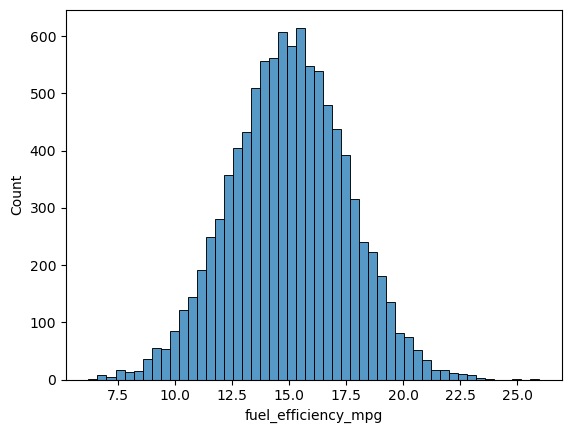

In [127]:
# bins = number of bars in the histogram
# in the diagram 1e6 means 10^6 = 1,000,000
sns.histplot(df.fuel_efficiency_mpg, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

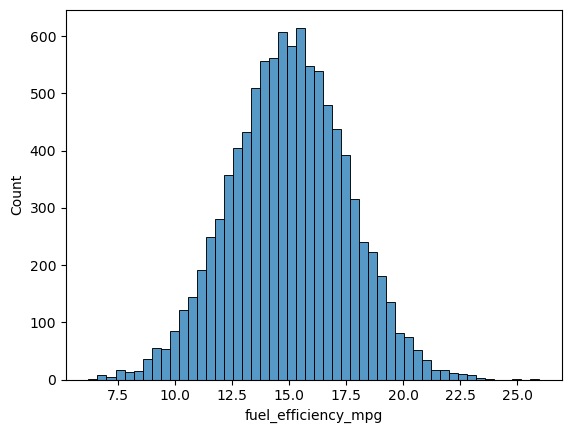

In [128]:
	sns.histplot(df.fuel_efficiency_mpg[df.fuel_efficiency_mpg < 100000], bins=50)


## Question 1

There's one column with missing values. What is it?

- [ ] `'engine_displacement'`
- [x]  `'horsepower'`
- [ ]  `'vehicle_weight'`
- [ ] `'model_year'`

In [129]:
# Sum of null values in each column
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

## Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- [ ] 49
- [ ] 99
- [x] 149
- [ ]  199

In [130]:
horsepower_median=df['horsepower'].median()
print("the median (50% percentile) for variable 'horsepower' is: ", horsepower_median)

the median (50% percentile) for variable 'horsepower' is:  149.0


## Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in TRAIN/VALIDATION/TEST sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [131]:
# number of records of the whole dataset
len(df)

9704

In [132]:
# Calculate 20% of whole dataset
int(len(df) * 0.2)

1940

In [133]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

In [134]:
# Sizes of the dataframes
print("n: ",n)
print("n_train: ", n_train)
print("n_test: ", n_test)
print("n_val: ", n_val)

n:  9704
n_train:  5824
n_test:  1940
n_val:  1940


In [135]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [136]:
# shuffle dataset
idx = np.arange(n)
idx
# Output: array([    0,     1,     2, ..., 11911, 11912, 11913])
 
# to make it reproducible
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [137]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [138]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [139]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [140]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [141]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [142]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- [x] Both are equally good

In [98]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg']

In [103]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [104]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [ ]:
def prepare_X(df, value_fill):
    df= df.fillna(value_fill)
    X = df.values
    return X

### Zero

In [145]:
X_train = prepare_X(df=df_train,value_fill=0)

In [146]:
w0, w = train_linear_regression(X_train, y_train)

In [152]:
X_val = prepare_X(df=df_val,value_fill=0)
y_pred = w0 + X_val.dot(w)
rmse_zero=round(rmse(y_val, y_pred), 2)

In [153]:
print("RMSE using Zero: ",rmse_zero)

RMSE using Zero:  0.04


### Mean

In [154]:
# Missing values in the horsepower column were filled using the most median (horsepower_mean)
horsepower_mean=df_train['horsepower'].mean()

In [155]:
X_train = prepare_X(df=df_train,value_fill=horsepower_mean)

In [156]:
w0, w = train_linear_regression(X_train, y_train)

In [157]:
X_val = prepare_X(df=df_val,value_fill=horsepower_mean)
y_pred = w0 + X_val.dot(w)
rmse_mean=round(rmse(y_val, y_pred), 2)

In [158]:
print("RMSE using Mean: ",rmse_mean)

RMSE using Mean:  0.04


## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [159]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [160]:
X_train = prepare_X(df_train,value_fill=0)

In [161]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

In [164]:
X_val = prepare_X(df_val,value_fill=0)
y_pred = w0 + X_val.dot(w)
rmse_lr_reg=rmse(y_val, y_pred)
rmse_lr_reg_mean=round(rmse_lr_reg,2)

In [165]:
print("RMSE Reg: ",rmse_lr_reg_mean)

RMSE Reg:  0.04


## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.




## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one